In [1]:
!apt install tesseract-ocr libtesseract-dev tesseract-ocr-jpn
!pip install pyocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libarchive-dev libleptonica-dev tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev tesseract-ocr
  tesseract-ocr-eng tesseract-ocr-jpn tesseract-ocr-osd
0 upgraded, 7 newly installed, 0 to remove and 18 not upgraded.
Need to get 9,950 kB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libarchive-dev amd64 3.6.0-1ubuntu1 [581 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libleptonica-dev amd64 1.82.0-3build1 [1,562 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libtesseract-dev amd64 4.1.1-2.1build1 [1,600 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:5 ht

In [3]:
from PIL import Image

import pyocr
import cv2

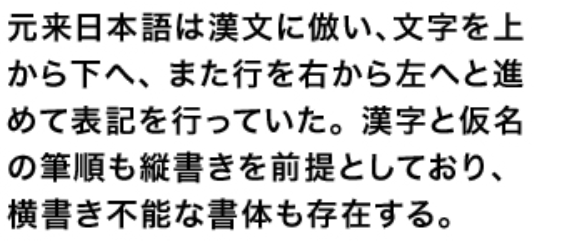

In [5]:
img1 = Image.open('sample1.png')
img1

In [7]:
tools = pyocr.get_available_tools()

In [8]:
len(tools)

2

In [10]:
tool = tools[0]
tool.get_name()

'Tesseract (sh)'

In [11]:
txt1 = tool.image_to_string (
    img1,
    lang='jpn',
    builder=pyocr.builders.TextBuilder(tesseract_layout=3)
)
txt1

'元来日本語は漢文に令い、文字を上\nから下へ、また行を右から左へと進\nめて表記を行っていた。 漢字と仮名\nの筆順も縦書きを前提としており、\n横書き不能な書体も存在する。'

In [12]:
print(txt1)

元来日本語は漢文に令い、文字を上
から下へ、また行を右から左へと進
めて表記を行っていた。 漢字と仮名
の筆順も縦書きを前提としており、
横書き不能な書体も存在する。


In [14]:
# test out sample with color
img2 = Image.open('sample2.jpeg')

txt2 = tool.image_to_string (
    img2,
    lang='jpn',
    builder=pyocr.builders.TextBuilder(tesseract_layout=6)
)
txt2

'1    |   マYe   <     3\n/               LUt(り4       の\n-財せの、あいあい忠             4    》  M ん\n0エア:\nY/    w 6 人 ESと     へ\n[4'

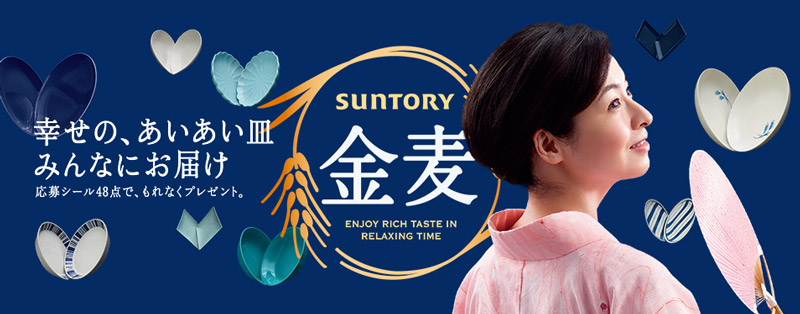

In [15]:
img2 = Image.open('sample2.jpeg')
img2

In [18]:
txt2 = tool.image_to_string (
    img2,
    lang='eng+jpn',
    builder=pyocr.builders.TextBuilder(tesseract_layout=11)
)
txt2

') v w SUNTORY *\n\n£40.50\n\nWI\n\n4\n\nみん な に お 届け\n\nプリ |\n\nの\n\nDO\n\nLT\n\nSo\n\nw'

In [19]:
print(txt2)

) v w SUNTORY *

£40.50

WI

4

みん な に お 届け

プリ |

の

DO

LT

So

w


In [20]:
img_gray = cv2.imread('sample2.jpeg', 0)
cv2.imwrite('sample3.png', img_gray)

True

In [21]:
img3 = Image.open('sample3.png')

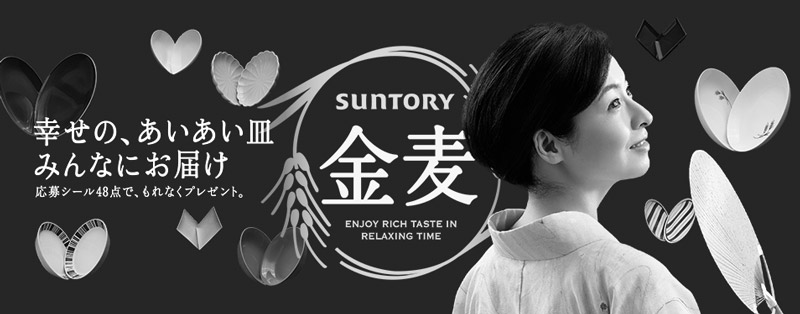

In [22]:
img3

In [24]:
txt3 = tool.image_to_string (
    img3,
    lang='eng+jpn',
    builder=pyocr.builders.TextBuilder(tesseract_layout=11)
)
txt3

'v に / PUT ce) a ae\n\nOe HVS’\n\nみん な に お 届け\n\ni\n\nER\n\nN\n\nw\n\nN\n\nINS'

In [25]:
print(txt3)

v に / PUT ce) a ae

Oe HVS’

みん な に お 届け

i

ER

N

w

N

INS


In [27]:
results = tool.image_to_string (
    img1,
    lang='jpn',
    builder=pyocr.builders.WordBoxBuilder(tesseract_layout=6)
)
results

In [28]:
results = tool.image_to_string (
    img1,
    lang='jpn',
    builder=pyocr.builders.WordBoxBuilder(tesseract_layout=6)
)
# results
len(results)

64

In [30]:
box = results[0]
box.content
box.position

((8, 12), (68, 42))

In [31]:
txt1[:10]

'元来日本語は漢文に令'

In [32]:
out = cv2.imread('sample1.png')
for box in results:
  cv2.rectangle(out, box.position[0], box.position[1], (0, 0, 255), 2)
cv2.imwrite('output.png', out)

True

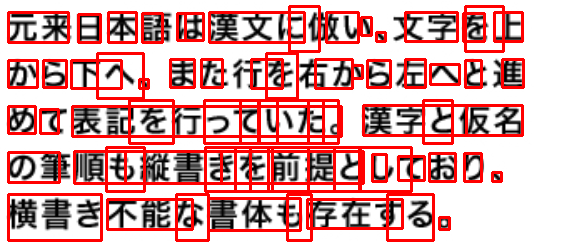

In [33]:
img_out = Image.open('output.png')
img_out